### DEMAPP10 

# Monopolist's Effective Supply Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, NLP, demo

figures=[]

### Residual Function

In [2]:
def resid(c):
    Q.c = c
    q = Q(p)
    return p + q / (-3.5 * p **(-4.5)) - np.sqrt(q) - q ** 2

### Approximation structure

In [3]:
n, a, b = 21, 0.5, 2.5
Q = BasisChebyshev(n, a, b)
c0 = np.zeros(n)
c0[0] = 2
p = Q.nodes

### Solve for effective supply function

In [4]:
monopoly = NLP(resid)
Q.c = monopoly.broyden(c0)

### Setup plot

In [5]:
nplot = 1000
p = np.linspace(a, b, nplot)
rplot = resid(Q.c)

### Plot effective supply

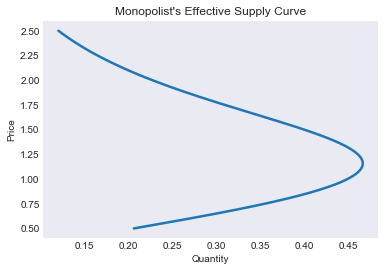

In [6]:
demo.figure("Monopolist's Effective Supply Curve", 'Quantity', 'Price')
plt.plot(Q(p), p)
figures.append(plt.gcf())

### Plot residual

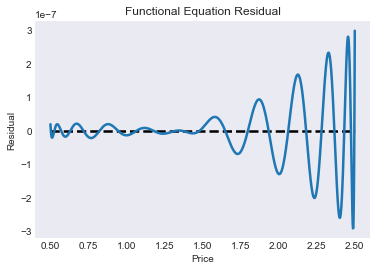

In [7]:
demo.figure('Functional Equation Residual', 'Price', 'Residual')
plt.hlines(0, a, b, 'k', '--')
plt.plot(p, rplot)
figures.append(plt.gcf())

In [8]:
#demo.savefig(figures)